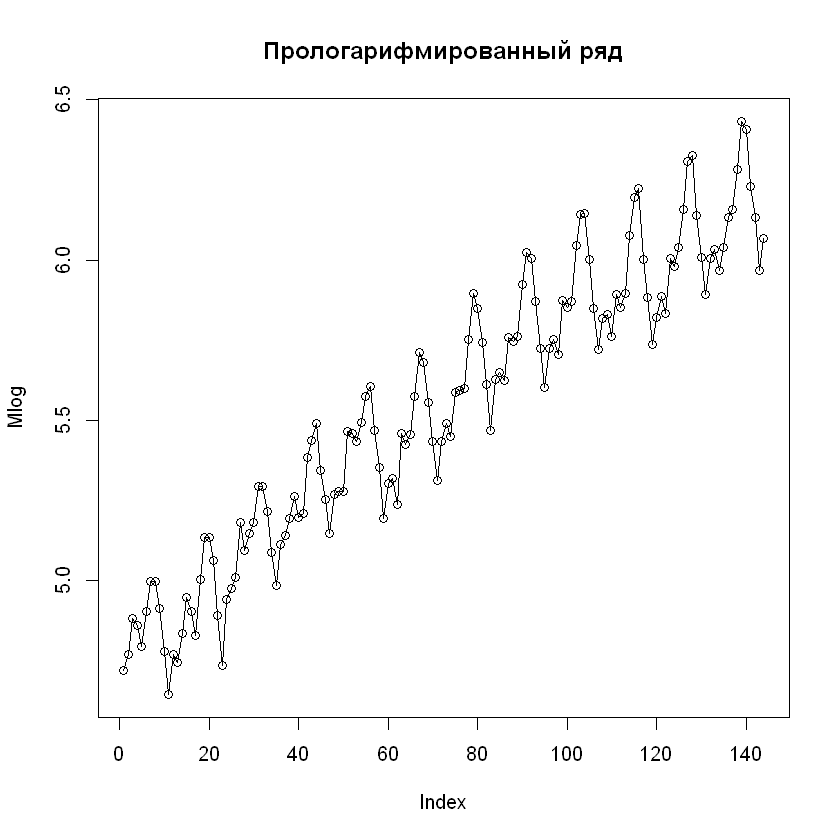

In [3]:
M <- read.csv(file = 'data3.csv', header = TRUE, sep = '\t', dec = ',')
library(tseries)
Mlog<-log(M$Pass) # прологарифмировать временной ряд
plot(Mlog, type="o", main="Прологарифмированный ряд") 
# график прологарифмированного ряда 

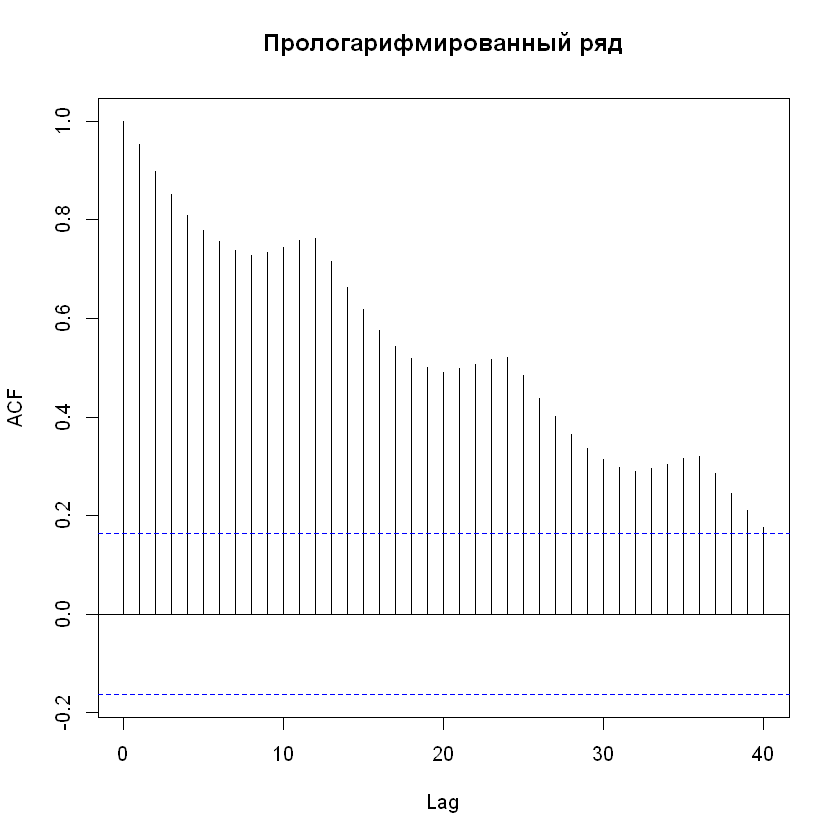

In [4]:
acf(Mlog, main="Прологарифмированный ряд", lag.max=40) 
# автокорреляционная функция


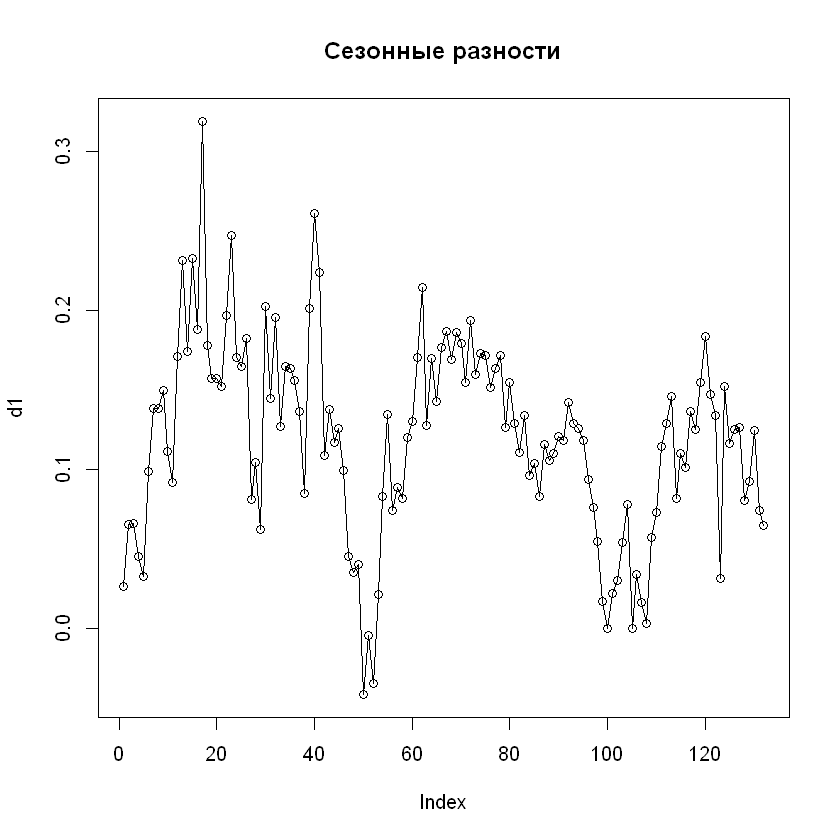


	Augmented Dickey-Fuller Test

data:  d1
Dickey-Fuller = -3.1899, Lag order = 5, p-value = 0.09265
alternative hypothesis: stationary


Warning message in pp.test(d1):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  d1
Dickey-Fuller Z(alpha) = -37.597, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


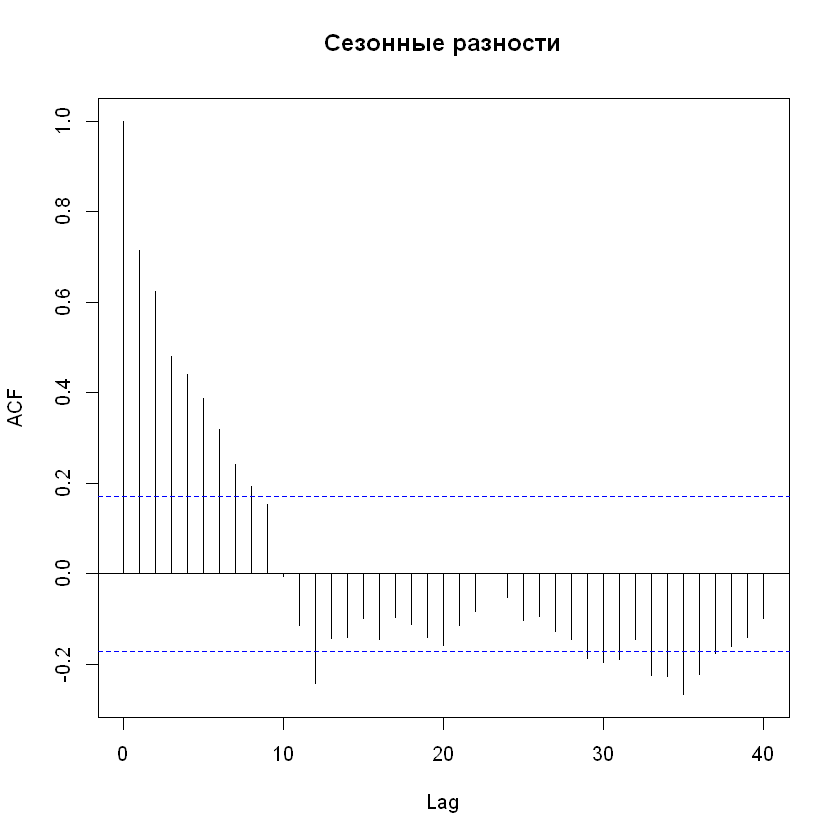

In [5]:
d1<-diff(Mlog, lag=12, differences=1) 
# взять сезонные разности - сезонное интегрирование 1-го порядка
plot(d1, type="o", main="Сезонные разности") # график сезонных разностей
acf(d1, main="Сезонные разности" , lag.max=40) # автокорреляционная функция
adf.test(d1) # проверить стационарность ряда d1
pp.test(d1) # проверить стационарность ряда d1

Warning message in adf.test(d2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  d2
Dickey-Fuller = -5.1993, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Warning message in pp.test(d2):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  d2
Dickey-Fuller Z(alpha) = -158.26, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


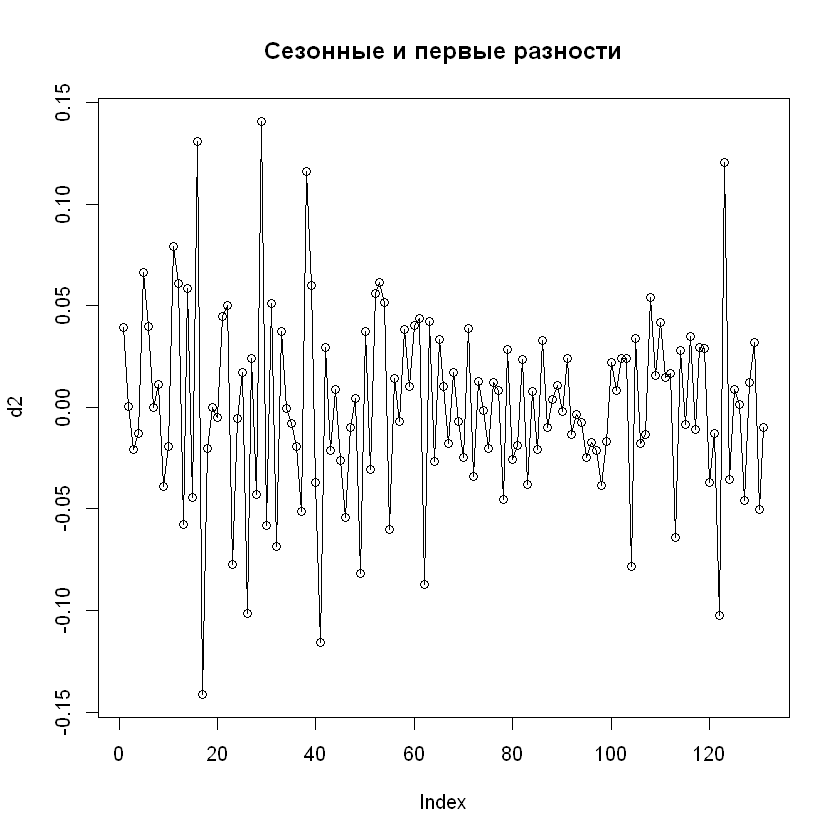

In [6]:
d2<-diff(d1, lag=1, differences=1) # взять первые разности
plot(d2, type="o", main="Сезонные и первые разности") # график ряда первых разностей
adf.test(d2) # проверить стационарность ряда первых разностей
pp.test(d2) # проверить стационарность ряда первых разностей

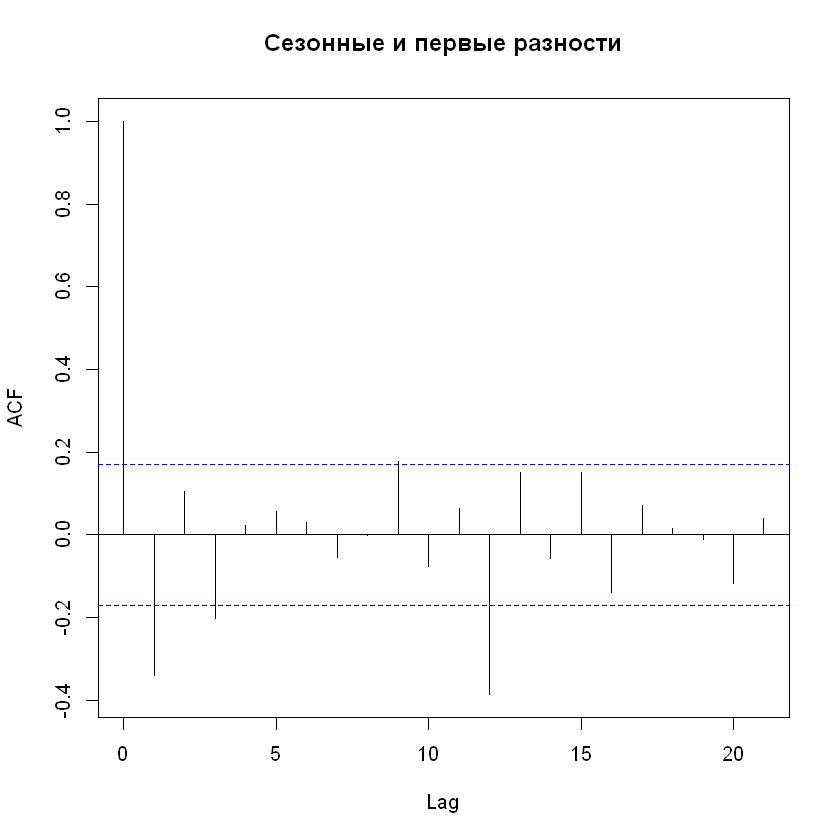

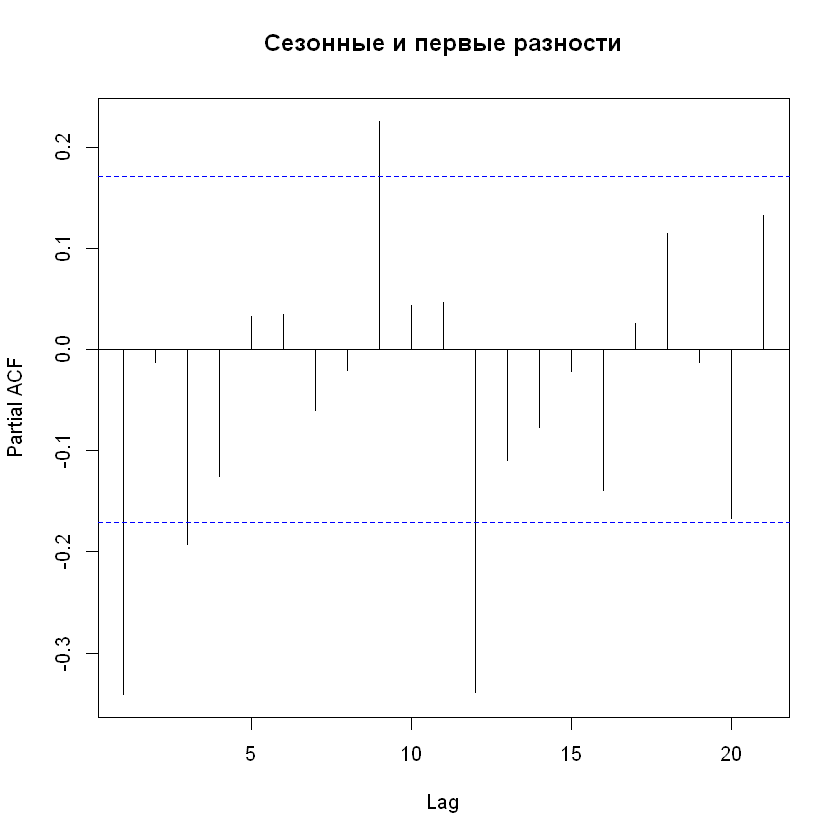

In [7]:
acf(d2, main="Сезонные и первые разности") # автокорреляционная функция
acf(d2, type = "partial", main="Сезонные и первые разности") 
# частная автокорреляционная функция

Warning message:
"package 'forecast' was built under R version 3.6.3"


Call:
arima(x = Mlog, order = c(1, 1, 0), seasonal = list(order = c(1, 1, 0), period = 12))

Coefficients:
          ar1     sar1
      -0.3745  -0.4637
s.e.   0.0808   0.0808

sigma^2 estimated as 0.001457:  log likelihood = 240.41,  aic = -474.82

Training set error measures:
                       ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.0006825378 0.03643174 0.02756604 0.01285082 0.4990929 0.3043094
                    ACF1
Training set -0.03189636



	Box-Pierce test

data:  residuals(fit1)
X-squared = 0.1465, df = 1, p-value = 0.7019


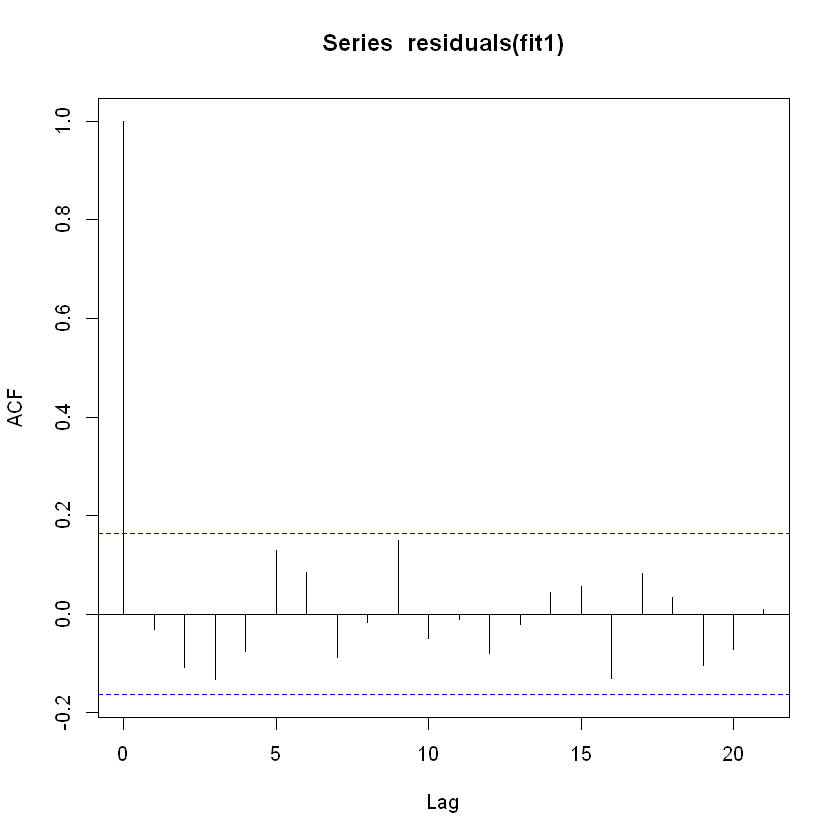

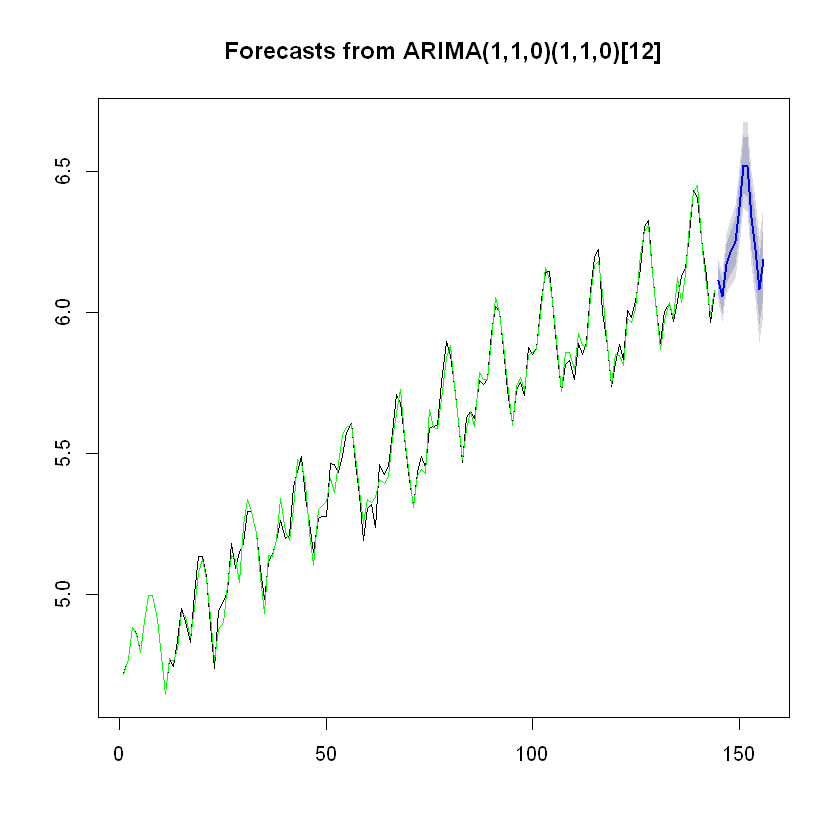

In [11]:
library(forecast)
fit1<-arima(Mlog, order=c(1,1,0), seasonal = list(order=c(1,1,0), period=12)) 
# модель ARIMA(1,1,0)(1,1,0)[12]
summary(fit1)
Box.test(residuals(fit1), type="Box-Pierce") # проверить остатки на белый шум
acf(residuals(fit1))
plot(forecast(fit1,h=12)) # график прогноза
lines(fitted(fit1),col="green") # график модели


Call:
arima(x = Mlog, order = c(2, 1, 0), seasonal = list(order = c(1, 1, 0), period = 12))

Coefficients:
          ar1      ar2     sar1
      -0.4057  -0.0799  -0.4723
s.e.   0.0876   0.0876   0.0806

sigma^2 estimated as 0.001446:  log likelihood = 240.82,  aic = -473.65

Training set error measures:
                       ME      RMSE     MAE        MPE      MAPE      MASE
Training set 0.0007460822 0.0362976 0.02751 0.01393056 0.4982578 0.3036907
                   ACF1
Training set -0.0126132



	Box-Pierce test

data:  residuals(fit2)
X-squared = 0.022909, df = 1, p-value = 0.8797


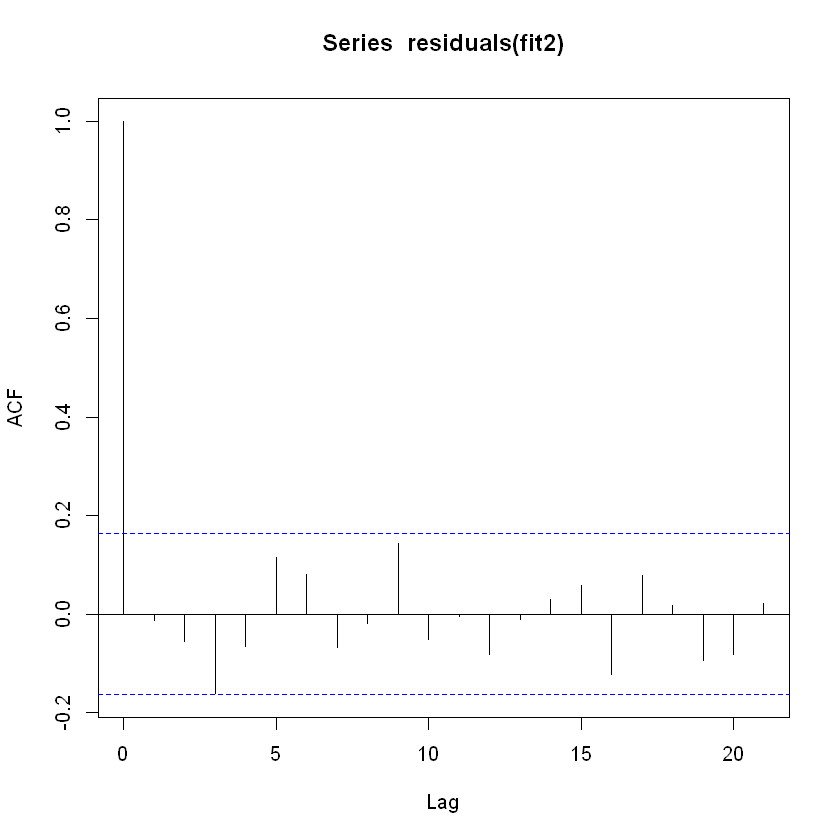

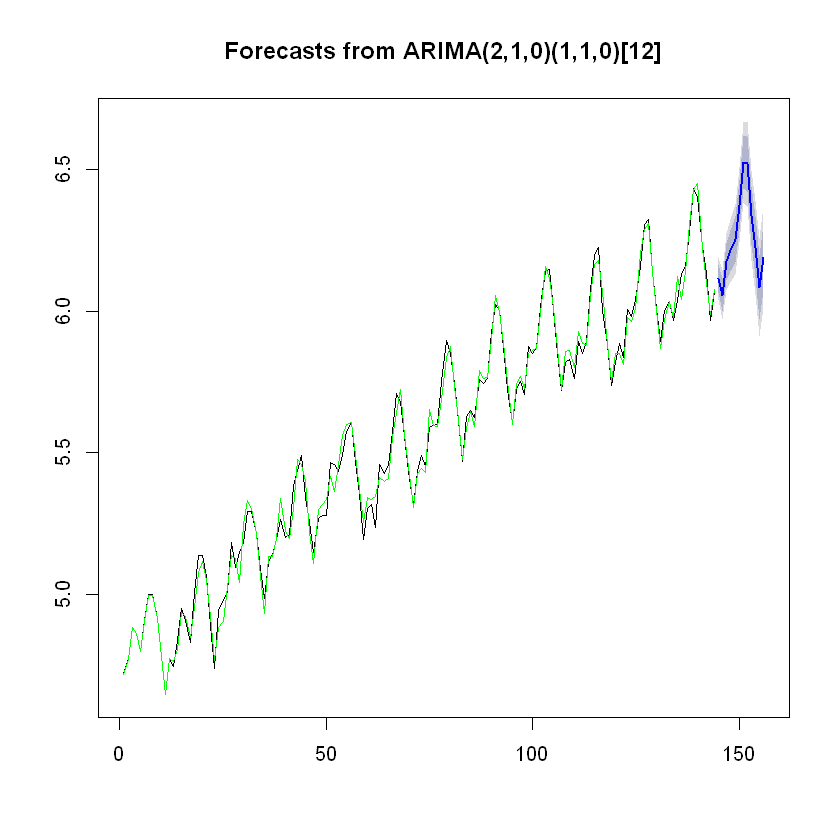

In [15]:
fit2<-arima(Mlog, order=c(2,1,0), seasonal = list(order=c(1,1,0), period=12)) 
summary(fit2)
Box.test(residuals(fit2), type="Box-Pierce") # проверить остатки на белый шум
acf(residuals(fit2))
plot(forecast(fit2,h=12)) # график прогноза
lines(fitted(fit2),col="green") # график модели

In [16]:
BIC(fit1, fit2)

,df,BIC
fit1,3,-466.1932
fit2,4,-462.1485


In [17]:
AIC(fit1, fit2)

,df,AIC
fit1,3,-474.8188
fit2,4,-473.6493
